<a href="https://colab.research.google.com/github/gnbhub/gnb_2022_1_Ai_team1/blob/master/Week7/jaewonhan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

drive_path = "/content/"
#read_csv 함수로 csv파일을 읽어 데이터프레임으로 변환
train = pd.read_csv(drive_path + "movies_train.csv")
test = pd.read_csv(drive_path + "movies_test.csv")
submission = pd.read_csv(drive_path + "submission.csv")

print(train.shape, test.shape, submission.shape)

(600, 12) (243, 11) (243, 2)


In [ ]:
train.head(3)

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083


In [ ]:
#장르 카테고리 확인
train['genre'].value_counts()

array(['액션', '느와르', '코미디', '다큐멘터리', '뮤지컬', '드라마', '멜로/로맨스', '공포', '서스펜스',
       '애니메이션', '미스터리', 'SF'], dtype=object)

In [ ]:
#관람등급 확인
train['screening_rat'].value_counts()

청소년 관람불가    204
15세 관람가     202
12세 관람가     102
전체 관람가       92
Name: screening_rat, dtype: int64

In [ ]:
#train 장르 원핫 인코딩
train = pd.get_dummies(data=train,columns=['genre'],prefix='')
train.rename(columns={'_드라마':'drama'},inplace=True)
train.rename(columns={'_다큐멘터리':'document'},inplace=True)
train.rename(columns={'_멜로/로맨스':'melo/romance'},inplace=True)
train.rename(columns={'_코미디':'comedy'},inplace=True)
train.rename(columns={'_공포':'horror'},inplace=True)
train.rename(columns={'_액션':'action'},inplace=True)
train.rename(columns={'_느와르':'noir'},inplace=True)
train.rename(columns={'_애니메이션':'anni'},inplace=True)
train.rename(columns={'_미스터리':'mystery'},inplace=True)
train.rename(columns={'_SF':'sf'},inplace=True)
train.rename(columns={'_뮤지컬':'musical'},inplace=True)
train.rename(columns={'_서스펜스':'suspense'},inplace=True)
train.head(3)

,title,distributor,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,...,_느와르,_다큐멘터리,_드라마,_멜로/로맨스,_뮤지컬,_미스터리,_서스펜스,_애니메이션,_액션,_코미디
0,개들의 전쟁,롯데엔터테인먼트,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,...,0,0,0,0,0,0,0,0,1,0
1,내부자들,(주)쇼박스,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,...,1,0,0,0,0,0,0,0,0,0
2,은밀하게 위대하게,(주)쇼박스,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
#train 관람등급 원핫 인코딩
train = pd.get_dummies(data=train,columns=['screening_rat'],prefix='')
train.rename(columns={'_12세 관람가':'over_12'},inplace=True)
train.rename(columns={'_15세 관람가':'over_15'},inplace=True)
train.rename(columns={'_전체 관람가':'over_0'},inplace=True)
train.rename(columns={'_청소년 관람불가':'over_19'},inplace=True)
train.head(3)

In [ ]:
#test 관람등급 원핫 인코딩
test = pd.get_dummies(data=test,columns=['screening_rat'],prefix='')
test.rename(columns={'_12세 관람가':'over_12'},inplace=True)
test.rename(columns={'_15세 관람가':'over_15'},inplace=True)
test.rename(columns={'_전체 관람가':'over_0'},inplace=True)
test.rename(columns={'_청소년 관람불가':'over_19'},inplace=True)

In [ ]:
#test 장르 원핫 인코딩
test = pd.get_dummies(data=test,columns=['genre'],prefix='')
test.rename(columns={'_드라마':'drama'},inplace=True)
test.rename(columns={'_다큐멘터리':'document'},inplace=True)
test.rename(columns={'_멜로/로맨스':'melo/romance'},inplace=True)
test.rename(columns={'_코미디':'comedy'},inplace=True)
test.rename(columns={'_공포':'horror'},inplace=True)
test.rename(columns={'_액션':'action'},inplace=True)
test.rename(columns={'_느와르':'noir'},inplace=True)
test.rename(columns={'_애니메이션':'anni'},inplace=True)
test.rename(columns={'_미스터리':'mystery'},inplace=True)
test.rename(columns={'_SF':'sf'},inplace=True)
test.rename(columns={'_뮤지컬':'musical'},inplace=True)
test.rename(columns={'_서스펜스':'suspense'},inplace=True)

In [ ]:
test.head(3)

,title,distributor,release_time,time,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,over_12,...,noir,document,drama,melo/romance,musical,mystery,suspense,anni,action,comedy
0,용서는 없다,시네마서비스,2010-01-07,125,김형준,3.005290e+05,2,304,3,0,...,1,0,0,0,0,0,0,0,0,0
1,아빠가 여자를 좋아해,(주)쇼박스,2010-01-14,113,이광재,3.427002e+05,4,275,3,1,...,0,0,0,1,0,0,0,0,0,0
2,하모니,CJ 엔터테인먼트,2010-01-28,115,강대규,4.206611e+06,3,419,7,1,...,0,0,1,0,0,0,0,0,0,0


In [25]:
submission.head(3)

,title,box_off_num
0,용서는 없다,0
1,아빠가 여자를 좋아해,0
2,하모니,0


In [26]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           600 non-null    object 
 1   distributor     600 non-null    object 
 2   release_time    600 non-null    object 
 3   time            600 non-null    int64  
 4   director        600 non-null    object 
 5   dir_prev_bfnum  270 non-null    float64
 6   dir_prev_num    600 non-null    int64  
 7   num_staff       600 non-null    int64  
 8   num_actor       600 non-null    int64  
 9   box_off_num     600 non-null    int64  
 10  sf              600 non-null    uint8  
 11  horror          600 non-null    uint8  
 12  noir            600 non-null    uint8  
 13  document        600 non-null    uint8  
 14  drama           600 non-null    uint8  
 15  melo/romance    600 non-null    uint8  
 16  musical         600 non-null    uint8  
 17  mystery         600 non-null    uin

In [ ]:
train.describe(include='all')

,title,distributor,release_time,time,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num,...,musical,mystery,suspense,anni,action,comedy,over_12,over_15,over_0,over_19
count,600,600,600,600.000000,600,2.700000e+02,600.000000,600.000000,600.000000,6.000000e+02,...,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000
unique,600,169,330,NaN,472,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,개들의 전쟁,CJ 엔터테인먼트,2015-10-22,NaN,홍상수,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,54,6,NaN,7,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,100.863333,NaN,1.050443e+06,0.876667,151.118333,3.706667,7.081818e+05,...,0.008333,0.028333,0.003333,0.035000,0.046667,0.088333,0.170000,0.336667,0.153333,0.340000
std,NaN,NaN,NaN,18.097528,NaN,1.791408e+06,1.183409,165.654671,2.446889,1.828006e+06,...,0.090982,0.166062,0.057687,0.183933,0.211100,0.284016,0.375946,0.472964,0.360609,0.474104
min,NaN,NaN,NaN,45.000000,NaN,1.000000e+00,0.000000,0.000000,0.000000,1.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,NaN,89.000000,NaN,2.038000e+04,0.000000,17.000000,2.000000,1.297250e+03,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,NaN,NaN,NaN,100.000000,NaN,4.784236e+05,0.000000,82.500000,3.000000,1.259100e+04,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,NaN,NaN,NaN,114.000000,NaN,1.286569e+06,2.000000,264.000000,4.000000,4.798868e+05,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000


In [ ]:
test.describe(include='all')

,title,distributor,release_time,time,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,over_12,...,noir,document,drama,melo/romance,musical,mystery,suspense,anni,action,comedy
count,243,243,243,243.000000,243,1.070000e+02,243.000000,243.000000,243.000000,243.000000,...,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000
unique,243,93,182,NaN,220,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,용서는 없다,CJ 엔터테인먼트,2015-09-10,NaN,조성규,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,31,4,NaN,3,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,109.798354,NaN,8.916695e+05,0.851852,159.316872,3.477366,0.164609,...,0.049383,0.135802,0.320988,0.160494,0.004115,0.028807,0.004115,0.032922,0.086420,0.094650
std,NaN,NaN,NaN,124.022711,NaN,1.217341e+06,1.200321,162.976607,2.111192,0.371593,...,0.217113,0.343286,0.467820,0.367821,0.064150,0.167608,0.064150,0.178800,0.281563,0.293335
min,NaN,NaN,NaN,40.000000,NaN,3.400000e+01,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,NaN,91.000000,NaN,6.250200e+04,0.000000,18.000000,2.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,NaN,NaN,NaN,104.000000,NaN,4.931200e+05,0.000000,105.000000,3.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,NaN,NaN,NaN,114.500000,NaN,1.080850e+06,1.000000,282.000000,4.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [27]:
train['director'].value_counts()

홍상수           7
장률            4
신재호           4
우민호           4
노진수           4
             ..
권오광           1
한윤선           1
박찬경           1
New Pistol    1
백운학           1
Name: director, Length: 472, dtype: int64

In [28]:
train['distributor'].value_counts()

CJ 엔터테인먼트        54
롯데엔터테인먼트         52
(주)NEW           30
(주)마운틴픽쳐스        29
(주)쇼박스           26
                 ..
OAL(올)            1
(주)에이원 엔터테인먼트     1
(주)콘텐츠 윙          1
위더스필름             1
퍼스트런              1
Name: distributor, Length: 169, dtype: int64

In [29]:
#제목: 의미가 없기 때문에 제거
train = train.drop(['title'],axis=1)
test = test.drop(['title'],axis=1)
#배우 수 제거
train = train.drop(['num_actor'],axis=1)
test = test.drop(['num_actor'],axis=1)

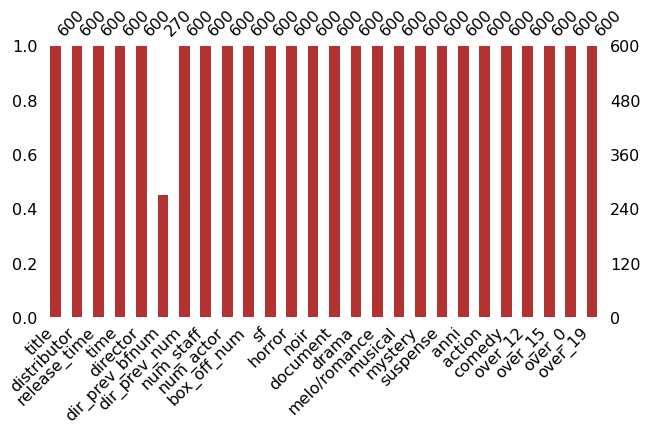

In [ ]:
import missingno as msno
msno.bar(train, figsize=(10,5), color=(0.7,0.2,0.2))
plt.show()

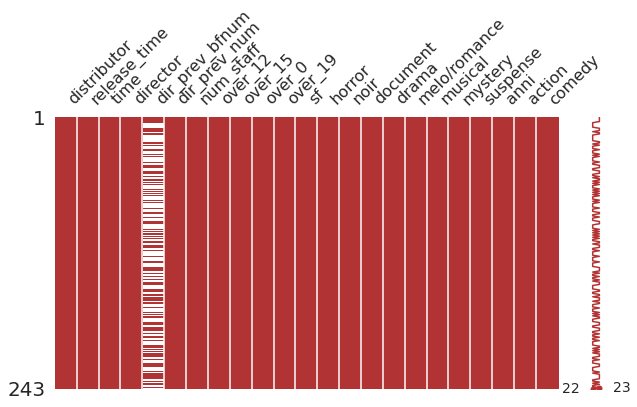

In [ ]:
msno.matrix(test,figsize=(10,5), color=(0.7,0.2,0.2))
plt.show()

In [30]:
# 개봉일을 바탕으로 년,월 변수 생성
train['year'] = train['release_time'].apply(lambda x: int(x[:4]))
train['month'] = train['release_time'].apply(lambda x: int(x[5:7]))
train =  train.drop(['release_time'],axis = 1)

test['year'] = test['release_time'].apply(lambda x: int(x[:4]))
test['month'] = test['release_time'].apply(lambda x: int(x[5:7]))
test =  test.drop(['release_time'],axis = 1)

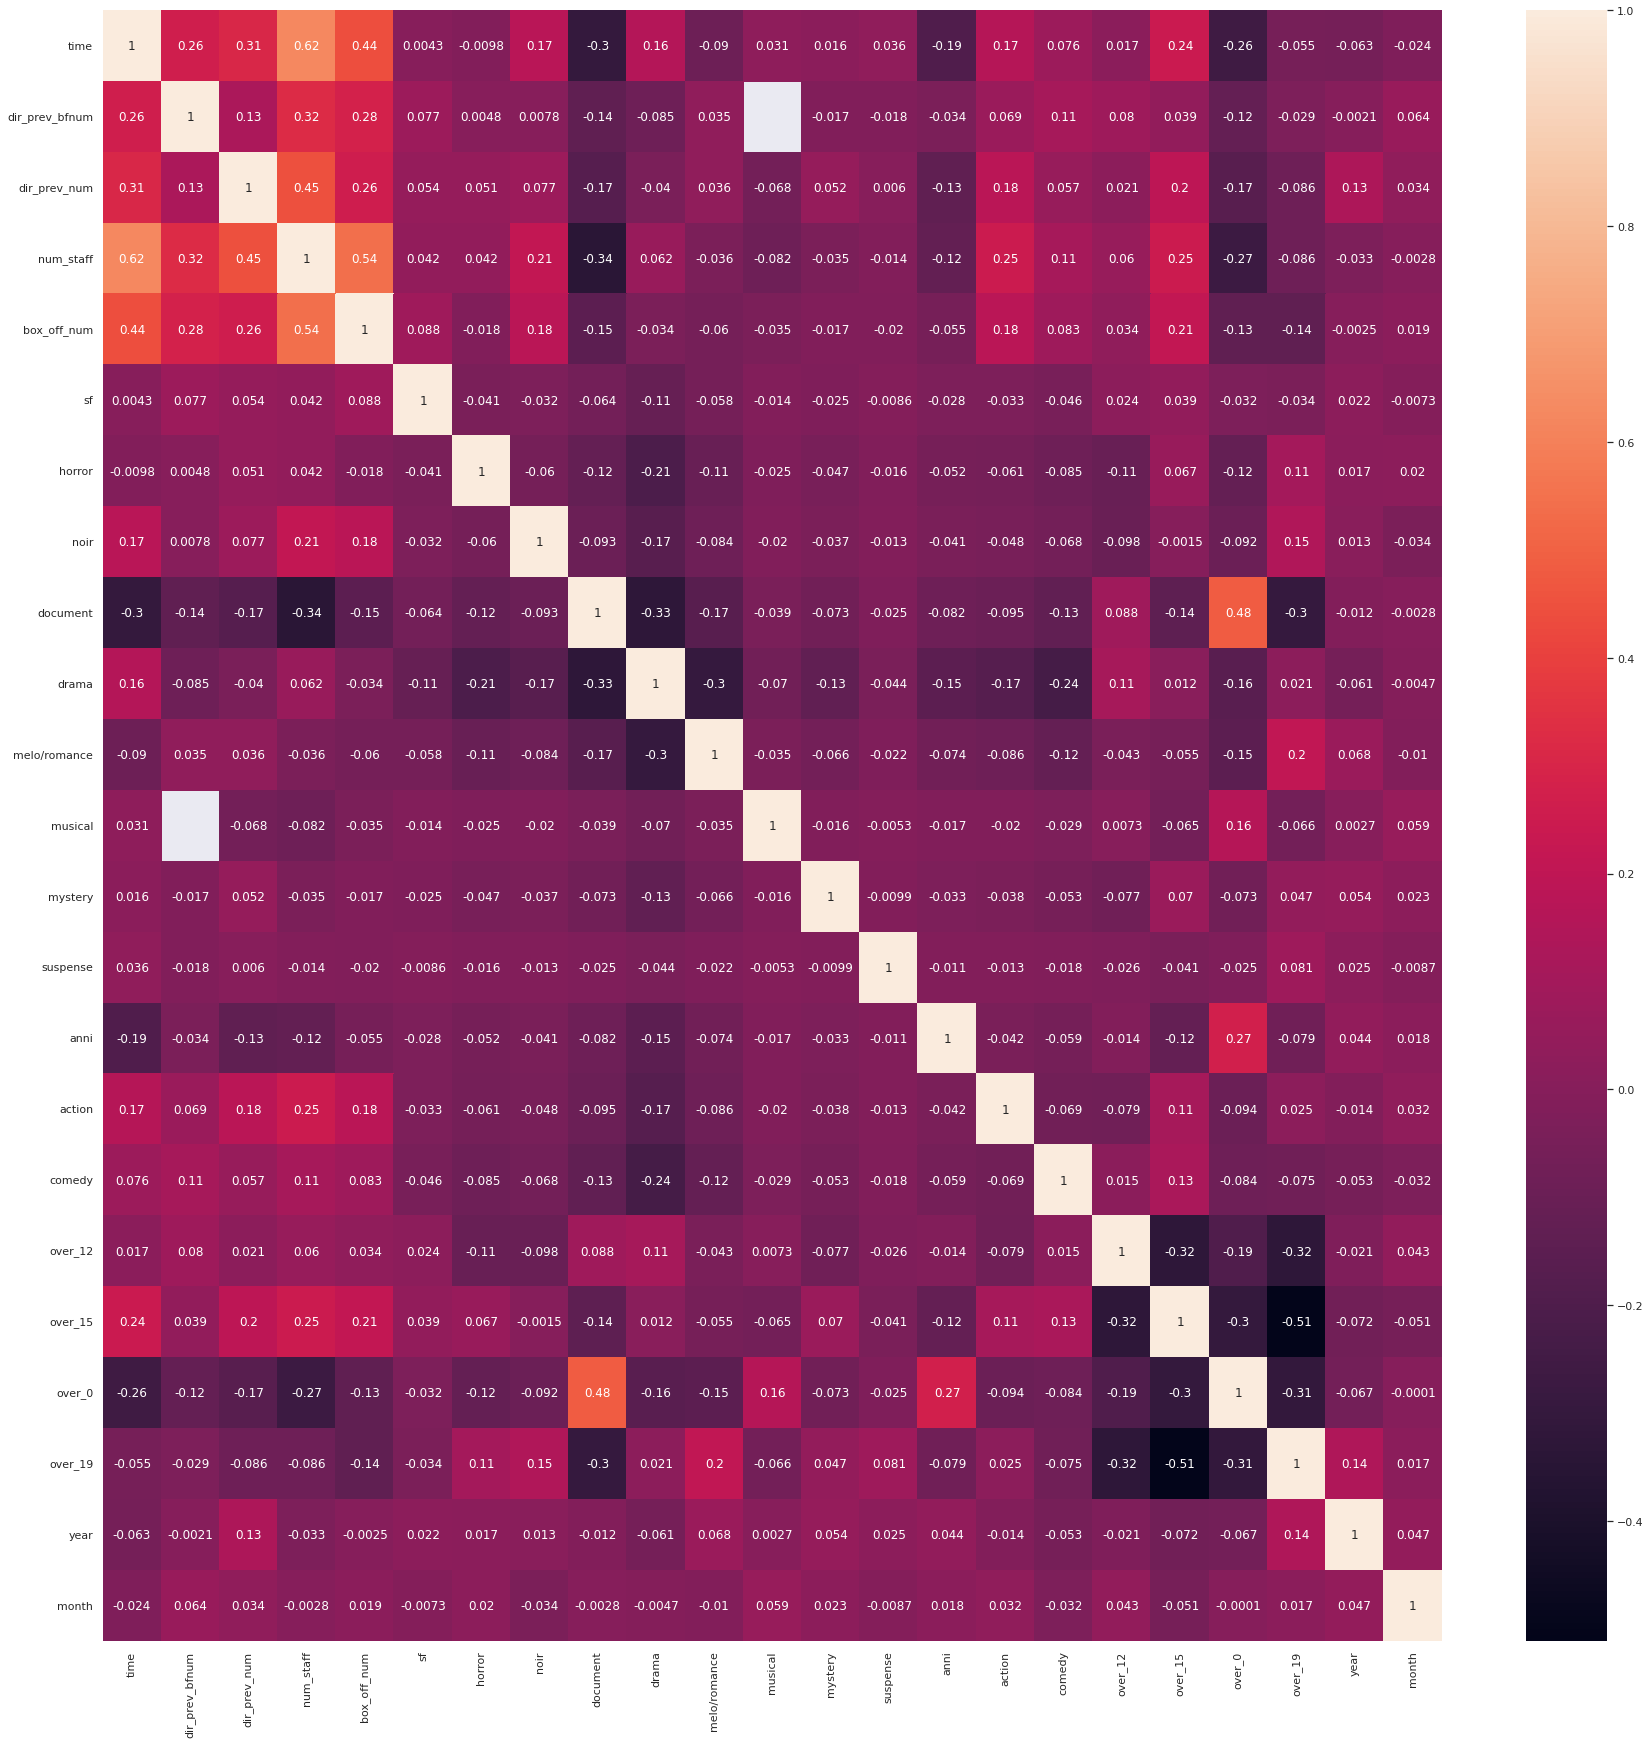

In [31]:
#숫자형 변수 간의 상관관계를 계산하여 히트맵 그리기
plt.figure(figsize=(30,30))
sns.set(font_scale=1)
sns.heatmap(train.corr(), annot=True,cbar=True)
plt.show()


In [32]:
#movie 전체 데이터셋 준비
train['TrainSplit'] = 'Train'
test['TrainSplit'] = 'Test'
data = pd.concat([train,test], axis=0)
print(data.shape)

(843, 26)


In [107]:
#숫자형 피처 추출
data_num = data.loc[:,['year','month','time','num_staff','sf','horror','noir','document','drama','melo/romance','musical','mystery','suspense','anni','action','comedy','over_12','over_15','over_0','over_19','box_off_num']]

#결측값 대체
#data_num['dir_prev_bfnum'] = data_num['dir_prev_bfnum'].fillna(0)

#학습용 데이터와 예측 대상인 테시트 데이터 구분
selected_features = ['year','month','time','num_staff','sf','horror','noir','document','drama','melo/romance','musical','mystery','suspense','anni','action','comedy','over_12','over_15','over_0','over_19']

X_train = data_num.loc[data['TrainSplit']=='Train',selected_features]
y_train = data_num.loc[data['TrainSplit']=='Train','box_off_num']

X_test = data_num.loc[data['TrainSplit']=='Test',selected_features]

print("Train 데이터셋 크기: ",X_train.shape,y_train.shape)
print("Test 데이터셋 크기: ",X_test.shape)

Train 데이터셋 크기:  (600, 20) (600,)
Test 데이터셋 크기:  (243, 20)


In [108]:
from sklearn.model_selection import train_test_split

X_data = train.loc[:,['year','month','time','num_staff','sf','horror','noir','document','drama','melo/romance','musical','mystery','suspense','anni','action','comedy','over_12','over_15','over_0','over_19']]
y_data = train.loc[:,'box_off_num']

X_train, X_test, y_train, y_test = train_test_split(X_data,y_data,test_size=0.2,shuffle=True,random_state=12)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(480, 20) (480,)
(120, 20) (120,)


In [111]:
#랜덤 포레스트
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(max_depth=5,random_state=12)
rfr.fit(X_train,y_train)

y_train_pred = rfr.predict(X_train)


X_test = data_num.loc[data['TrainSplit']=='Test',selected_features]
y_test_pred = rfr.predict(X_test)

submission['box_off_num'] = y_test_pred
submission_filepath = drive_path + 'baseline_submission_001.csv'
submission.to_csv(submission_filepath, index=False)
submission.head(5)

,title,box_off_num
0,용서는 없다,2.230232e+06
1,아빠가 여자를 좋아해,1.064522e+06
2,하모니,1.410321e+06
3,의형제,1.617790e+06
4,평행 이론,1.051394e+06


In [118]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits=5, shuffle=True, random_state=20)

num_fold = 1
for tr_idx, val_idx in kfold.split(X_train):
  print("%s Fold ----------------------------"% num_fold)
  print("훈련: ", len(tr_idx), tr_idx[:10])
  print("검증: ", len(val_idx),val_idx[:10])
  num_fold = num_fold + 1

1 Fold ----------------------------
훈련:  384 [ 0  1  3  4  5  6  8 11 12 15]
검증:  96 [ 2  7  9 10 13 14 17 19 29 30]
2 Fold ----------------------------
훈련:  384 [ 1  2  3  4  5  6  7  9 10 11]
검증:  96 [ 0  8 16 20 21 24 28 32 33 45]
3 Fold ----------------------------
훈련:  384 [ 0  2  3  4  6  7  8  9 10 11]
검증:  96 [ 1  5 15 18 23 36 38 39 44 48]
4 Fold ----------------------------
훈련:  384 [0 1 2 3 4 5 6 7 8 9]
검증:  96 [11 12 37 41 51 52 54 55 57 60]
5 Fold ----------------------------
훈련:  384 [ 0  1  2  5  7  8  9 10 11 12]
검증:  96 [ 3  4  6 22 25 26 27 40 42 43]


In [123]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
val_scores = []
num_fold = 1
for tr_idx, val_idx in kfold.split(X_train,y_train):
  X_tr, X_val = X_train.iloc[tr_idx, :], X_train.iloc[val_idx,:]
  y_tr, y_val = y_train.iloc[tr_idx], y_train.iloc[val_idx]

  rfc = RandomForestClassifier(max_depth=5,random_state=20)
  rfc.fit(X_tr,y_tr)
  y_val_pred = rfc.predict(X_val)
  val_acc = accuracy_score(y_val,y_val_pred)
  print("%d Fold Accuracy : %.10f" % (num_fold, val_acc))
  val_scores.append(val_acc)
  num_fold += 1


1 Fold Accuracy : 0.0000000000
2 Fold Accuracy : 0.0000000000
3 Fold Accuracy : 0.0104166667
4 Fold Accuracy : 0.0000000000
5 Fold Accuracy : 0.0104166667


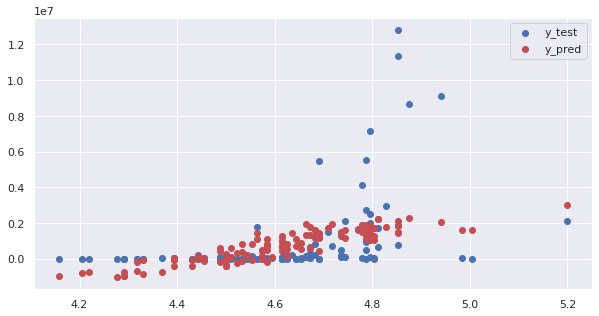

In [ ]:
#선형 회귀 모형
#from sklearn.linear_model import LinearRegression
#lr = LinearRegression()
#lr.fit(X_train,y_train)

#y_test_pred = lr.predict(X_test)

#plt.figure(figsize=(10,5))
#plt.scatter(X_test['log_time'],y_test,label='y_test')
#plt.scatter(X_test['log_time'],y_test_pred,c='r',label='y_pred')
#plt.legend(loc='best')
#plt.show()

In [ ]:
#y_train_pred = lr.predict(X_train)

#train_mse = mean_squared_error(y_train,y_train_pred)
#print("Train MSE: %.4f" % train_mse)

#test_mse = mean_squared_error(y_test, y_test_pred)
#print("Test MSE: %.4f" % test_mse)

Train MSE: 2371954933374.9575
Test MSE: 3724642537205.1929


In [ ]:
#from sklearn.model_selection import cross_val_score
#lr = LinearRegression()
#mse_scores = -1 * cross_val_score(lr,X_train,y_train, cv=5,scoring='neg_mean_squared_error')
#print("개별 Fold의 MSE: ", np.round(mse_scores))
#print("평균 MSE: %.4f" % np.mean(mse_scores))

개별 Fold의 MSE:  [5.17662133e+12 3.43202097e+12 8.83478895e+11 1.40538520e+12
 1.32908783e+12]
평균 MSE: 2445318844853.1982


In [ ]:
#결측치가 많은 데이터 제거
#train = train.drop(['dir_prev_bfnum'],axis=1)
#test = test.drop(['dir_prev_bfnum'],axis=1)

In [ ]:
#감독명: 너무 다양해서 제거
#train = train.drop(['director'],axis=1)
#test = test.drop(['director'],axis=1)

In [ ]:
#train.distributor.value_counts()

In [ ]:
# 상위 5개의 배급사를 제외하고 '기타'로처리
#distributor_list = train.distributor.value_counts()[:5]
#def func(distributor):
#    if distributor in distributor_list:
#        return distributor
#    else:
#        return '기타'

#train['distributor'] = train['distributor'].apply(lambda x : func(x))
#test['distributor'] = test['distributor'].apply(lambda x : func(x))